# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data = pd.read_csv(r'/Users/edgartome_1/IronHack/IronLabs/Module3/Lab9/data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
#What does each column mean?
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
# Any missing data to remove?
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
#Unique values
allcol = list(data.columns)
allcol
for x in allcol:
    print(x)
    print(data[x].unique())
    print('\n')

Channel
[2 1]


Region
[3 1 2]


Fresh
[ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    140  42312
   7149   2101  14903   9434   7388   

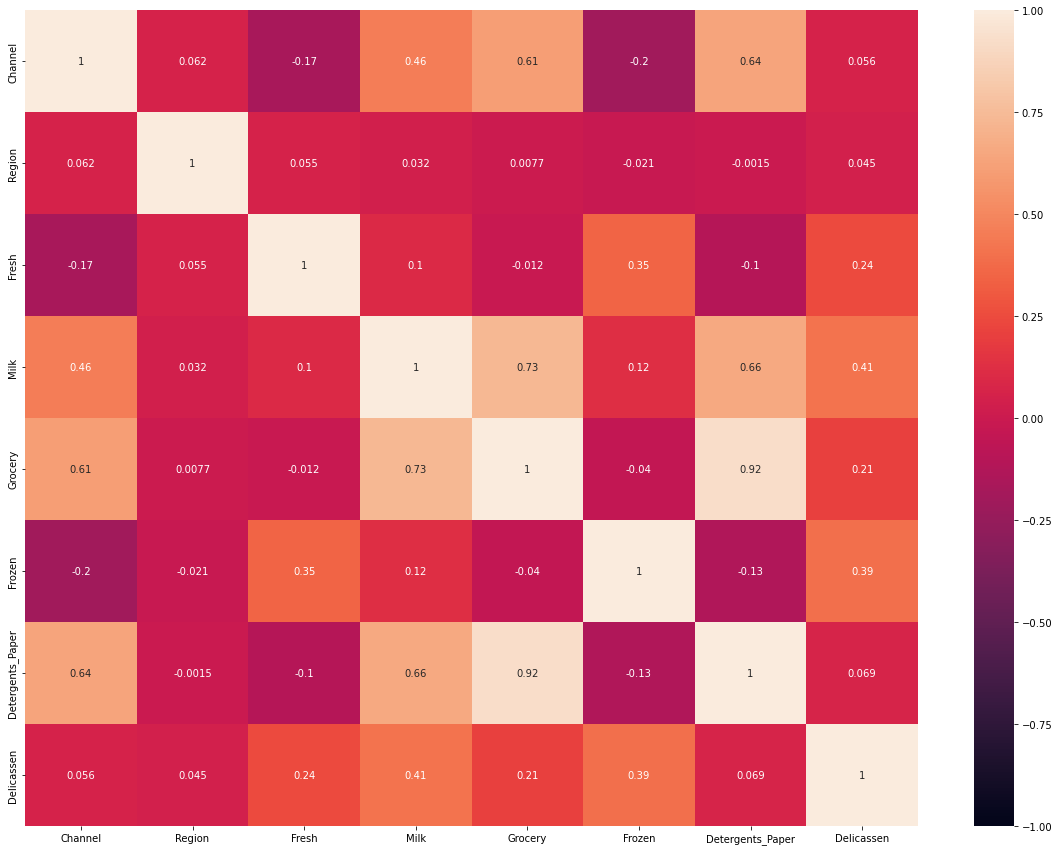

In [7]:
# Column collinearity - any high correlations?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [8]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#numcol = data.columns
#for x in numcol:
    #sns.boxplot(data = data, y=x)
    #plt.title(x)
    #plt.show()

<AxesSubplot:>

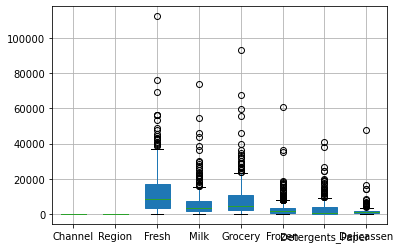

In [9]:
# Descriptive statistics - any outliers to remove?
import matplotlib.pyplot as plt
figsize=(20, 10)
data.boxplot(widths = 0.6, patch_artist = True)

In [10]:
#sns.boxplot(data=data)

In [11]:
#for col in data.columns:
    #sns.distplot(data[col],hist=True)
    #plt.xlabel(col)
    #plt.show()

In [12]:
#Print the numebr of the outliers by column
numcol = data.columns
for x in numcol:
    Q3 = data[x].quantile(0.75)
    Q1= data[x].quantile(0.25)
    IQR = Q3 - Q1
    filters = data[data[x]>Q3 + 1.5*IQR]
    print(x)
    print(len(filters))
    print('\n')

Channel
0


Region
0


Fresh
20


Milk
28


Grocery
24


Frozen
43


Detergents_Paper
30


Delicassen
27




In [13]:
# Descriptive statistics - any outliers to remove?
q1, q3= np.percentile(data,[25,75])
q1,q3

(3.0, 4768.0)

In [14]:
iqr = q3 - q1

In [15]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [16]:
print(lower_bound)
print(upper_bound)

-7144.5
11915.5


In [17]:
# Column-wise data distribution - is the distribution skewed?
skewness = data.skew()
skewness

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

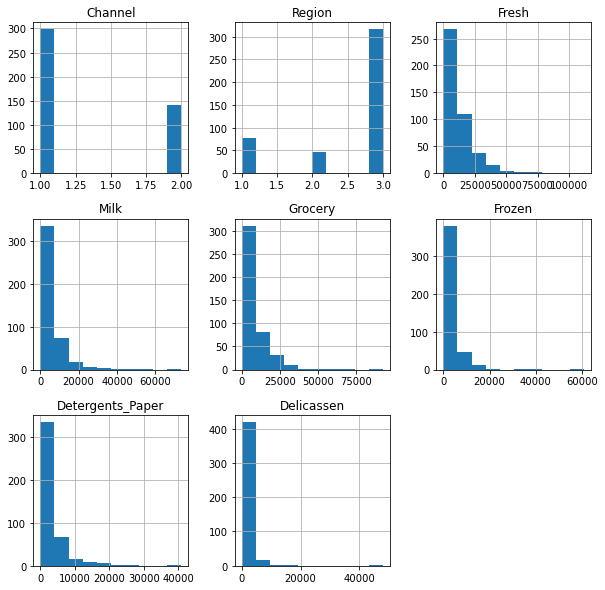

In [18]:
data.hist(figsize=(10,10))

<AxesSubplot:xlabel='Delicassen', ylabel='Density'>

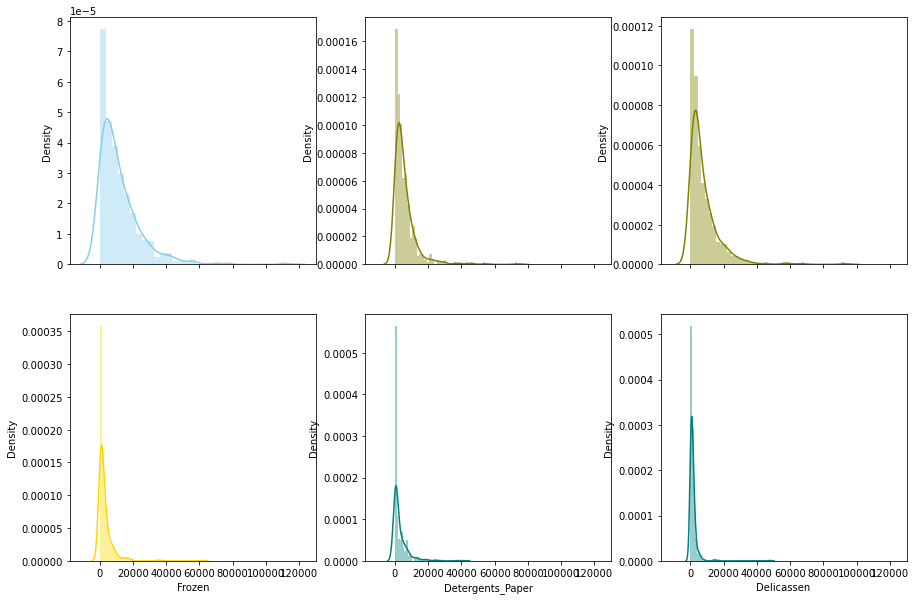

In [19]:
# plot
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)
sns.distplot( data["Fresh"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["Milk"] , color="olive", ax=axes[0, 1])
sns.distplot( data["Grocery"] , color="olive", ax=axes[0, 2])
sns.distplot( data["Frozen"] , color="gold", ax=axes[1, 0])
sns.distplot( data["Detergents_Paper"] , color="teal", ax=axes[1, 1])
sns.distplot( data["Delicassen"] , color="teal", ax=axes[1, 2])

In [20]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [21]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [22]:
# Your observations here
#The column of Detergente and Groceries have high correlation, should drop one of the columns.
#The is no missing values.
#Have some outliers

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [23]:
# Your code here
#Decide to not clean
#data = data.drop('Detergents_Paper', axis=1)
#data.head()

#plt.figure(figsize=(20, 15))
#heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

#numcol = data.columns
#for x in numcol:
    #sns.boxplot(data = data, y=x)
    #plt.title(x)
    #plt.show()
    
#To remove outliers
#for x in numcol:
    #Q3 = data[x].quantile(0.75)
    #Q1= data[x].quantile(0.25)
    #IQR = Q3 - Q1
    #data.drop(data[data[x]>Q3 + 1.5*IQR].index,inplace=True)
    #data.drop(data[data[x]<Q1 - 1.5*IQR].index,inplace=True)

#numcol = data.columns
#for x in numcol:
    #sns.boxplot(data = data, y=x)
    #plt.title(x)
    #plt.show()
    

In [24]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<AxesSubplot:xlabel='Fresh'>

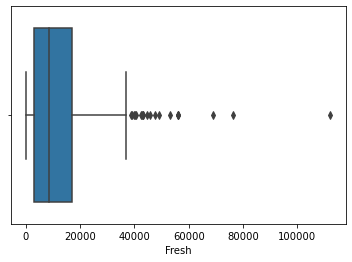

In [25]:
sns.boxplot(x=data['Fresh'])

In [26]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Channel                 1.00
Region                  1.00
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64


In [27]:
#Remove outliers that are above and below the Q1 and Q3 quartile
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Channel                 1.00
Region                  1.00
Fresh               10997.50
Milk                 4899.25
Grocery              6917.00
Frozen               2005.50
Detergents_Paper     3229.50
Delicassen           1095.25
dtype: float64


In [29]:
from scipy import stats
z = np.abs(stats.zscore(data))
data = data[(z < 3).all(axis=1)]

In [30]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Channel                 1.00
Region                  1.00
Fresh               10628.25
Milk                 4848.00
Grocery              6637.00
Frozen               1962.50
Detergents_Paper     3147.00
Delicassen           1081.75
dtype: float64


In [31]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


<AxesSubplot:xlabel='Delicassen', ylabel='Density'>

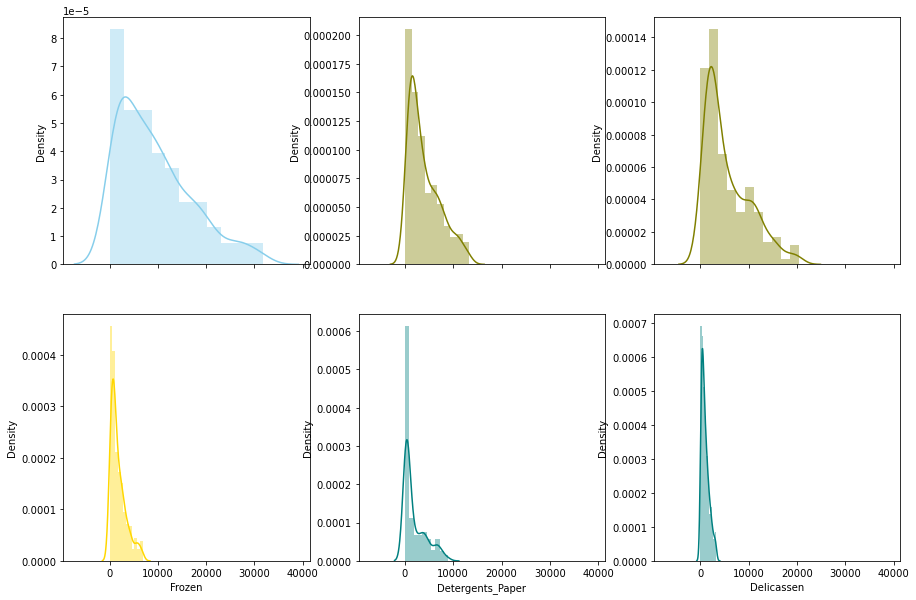

In [32]:
# plot
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)
sns.distplot( data["Fresh"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["Milk"] , color="olive", ax=axes[0, 1])
sns.distplot( data["Grocery"] , color="olive", ax=axes[0, 2])
sns.distplot( data["Frozen"] , color="gold", ax=axes[1, 0])
sns.distplot( data["Detergents_Paper"] , color="teal", ax=axes[1, 1])
sns.distplot( data["Delicassen"] , color="teal", ax=axes[1, 2])

<AxesSubplot:xlabel='Fresh'>

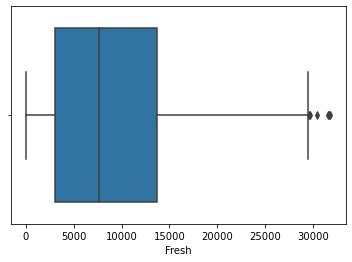

In [33]:
sns.boxplot(x=data['Fresh'])

In [34]:
# Your comment here
#Removed outliers and normalize the data

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [35]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

customers_ds_scale = StandardScaler().fit(data)

customers_scale = customers_ds_scale.transform(data)

customers_scale

array([[ 1.60963011,  0.58315879,  0.43180149, ..., -0.98001955,
         0.33500247,  0.45364115],
       [ 1.60963011,  0.58315879, -0.30109392, ..., -0.00962326,
         0.60531505,  1.01317031],
       [-0.62126074,  0.58315879,  0.50963571, ...,  2.90031184,
        -0.61130989,  1.02849988],
       ...,
       [-0.62126074,  0.58315879,  0.96227567, ..., -0.6828827 ,
         0.20268468, -0.18509076],
       [-0.62126074,  0.58315879,  0.12111757, ..., -0.46347786,
        -0.75934861,  1.45900519],
       [-0.62126074,  0.58315879, -0.85873172, ..., -1.07342332,
        -0.62441067, -1.18917734]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [36]:
# Your code here:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans()

kmeans.fit(customers_scale)

y_kmeans = kmeans.predict(customers_scale)

Count the values in `labels`.

In [37]:
# Your code here:

data['label'] = kmeans.labels_

data['label'].value_counts()

1    94
6    45
0    42
4    38
5    34
2    31
3    21
7    11
Name: label, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [38]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=0.5)

dbscan_cluster.fit(customers_scale)


DBSCAN()

Count the values in `labels_DBSCAN`.

In [39]:
# Your code here

data['labels_DBSCAN'] = dbscan_cluster.labels_

data['labels_DBSCAN'].value_counts()

-1    297
 1     12
 0      7
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

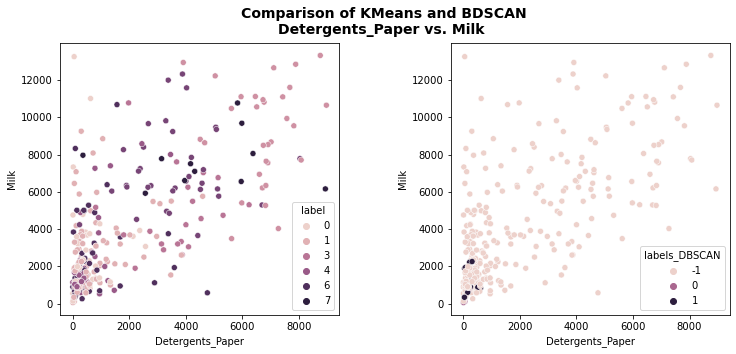

In [40]:
# Your code here:

fig = plt.figure(figsize=(12, 5))

fig.subplots_adjust(hspace=1, wspace=0.4)

fig.suptitle('Comparison of KMeans and BDSCAN\nDetergents_Paper vs. Milk ', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(1, 2, 1)

ax_2 = fig.add_subplot(1, 2, 2)

sns.scatterplot("Detergents_Paper", "Milk", data=data, hue='label',ax=ax_1)

sns.scatterplot("Detergents_Paper", "Milk", data=data, hue='labels_DBSCAN',ax=ax_2)


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>

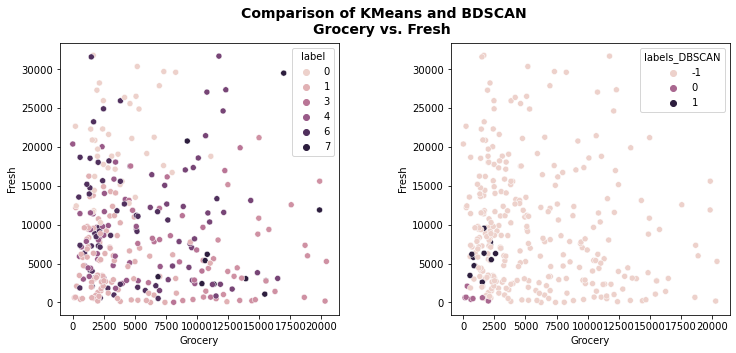

In [41]:
# Your code here:
fig = plt.figure(figsize=(12, 5))

fig.subplots_adjust(hspace=1, wspace=0.4)

fig.suptitle('Comparison of KMeans and BDSCAN\nGrocery vs. Fresh ', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(1, 2, 1)

ax_2 = fig.add_subplot(1, 2, 2)

sns.scatterplot("Grocery","Fresh", data=data, hue='label',ax=ax_1)

sns.scatterplot("Grocery","Fresh", data=data, hue='labels_DBSCAN',ax=ax_2)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

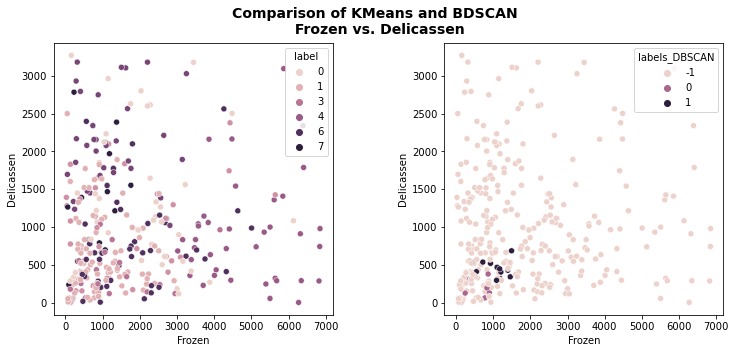

In [42]:
# Your code here:
fig = plt.figure(figsize=(12, 5))

fig.subplots_adjust(hspace=1, wspace=0.4)

fig.suptitle('Comparison of KMeans and BDSCAN \n Frozen vs. Delicassen', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(1, 2, 1)

ax_2 = fig.add_subplot(1, 2, 2)

sns.scatterplot("Frozen","Delicassen", data=data, hue='label',ax=ax_1)

sns.scatterplot("Frozen","Delicassen", data=data, hue='labels_DBSCAN',ax=ax_2)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [43]:
# Your code here:

data.groupby('label').agg('mean')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
label,,,,,,,,,
0,1.000000,2.857143,20492.214286,2832.904762,3745.500000,1956.500000,525.714286,1303.523810,-1.000000
1,1.000000,2.946809,5222.819149,2473.882979,3090.968085,984.893617,728.436170,645.797872,-0.670213
2,1.935484,2.903226,5188.612903,9209.354839,14250.516129,1492.129032,6698.161290,938.483871,-1.000000
3,2.000000,2.714286,9100.857143,4606.857143,8123.380952,1183.952381,3513.761905,394.190476,-1.000000
4,1.026316,2.605263,8155.631579,2383.421053,2691.973684,4843.315789,621.184211,910.000000,-1.000000
5,1.911765,2.941176,11441.794118,7236.676471,9963.705882,1201.911765,3600.617647,2120.235294,-1.000000
6,1.000000,1.133333,10382.044444,2427.377778,3072.977778,1806.488889,732.666667,785.311111,-1.000000
7,1.545455,1.000000,8078.272727,7641.909091,12818.454545,869.818182,4689.818182,1432.909091,-1.000000


In [44]:
data.groupby('labels_DBSCAN').agg('mean')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
labels_DBSCAN,,,,,,,,,
-1,1.296296,2.518519,9699.488215,4188.222222,5909.151515,1834.713805,2017.905724,1023.518519,2.925926
0,1.000000,3.000000,729.571429,636.142857,801.000000,575.285714,79.571429,173.428571,1.000000
1,1.000000,3.000000,6059.666667,1276.333333,1661.833333,1058.833333,224.500000,449.500000,1.000000


Which algorithm appears to perform better?

In [45]:
# Your observations here
#Observing the dispersion of the points in the graphs, the DBSCAN algorithm performs better.

# Challenge 6 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [46]:
# Your code here
#Try 5 clusters
for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customers_scale)
    data['label_k'+ str(i)] = kmeans.labels_



In [47]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label,labels_DBSCAN,label_k2,label_k3,label_k4,label_k5,label_k6,label_k7
0,2,3,12669,9656,7561,214,2674,1338,5,-1,0,0,3,0,1,4
1,2,3,7057,9810,9568,1762,3293,1776,5,-1,0,0,3,2,1,4
3,1,3,13265,1196,4221,6404,507,1788,4,-1,1,1,1,4,4,3
5,2,3,9413,8259,5126,666,1795,1451,5,-1,0,0,3,0,1,4
6,2,3,12126,3199,6975,480,3140,545,3,-1,0,0,3,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395,0,-1,1,1,2,1,3,0
433,1,3,1982,3218,1493,1541,356,1449,1,-1,1,1,2,1,0,2
434,1,3,16731,3922,7994,688,2371,838,0,-1,1,1,2,1,3,0
438,1,3,10290,1981,2232,1038,168,2125,0,-1,1,1,2,1,3,2


In [48]:
#Try 2 clusters
#kmeans2 = KMeans(n_clusters=2)

#kmeans2.fit(customers_scale)

#data['label_k2'] = kmeans2.labels_

#data['label_k2'].value_counts()

#Try 10 clusters
#kmeans10 = KMeans(n_clusters=10)

#kmeans10.fit(customers_scale)

#data['label_k10'] = kmeans10.labels_

#data['label_k10'].value_counts()

#Try 4 clusters
#kmeans4 = KMeans(n_clusters=4)

#kmeans4.fit(customers_scale)

#data['label_k4'] = kmeans4.labels_

#data['label_k4'].value_counts()

#Try 3 clusters
#kmeans3 = KMeans(n_clusters=3)

#kmeans3.fit(customers_scale)

#data['label_k3'] = kmeans3.labels_

#data['label_k3'].value_counts()

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

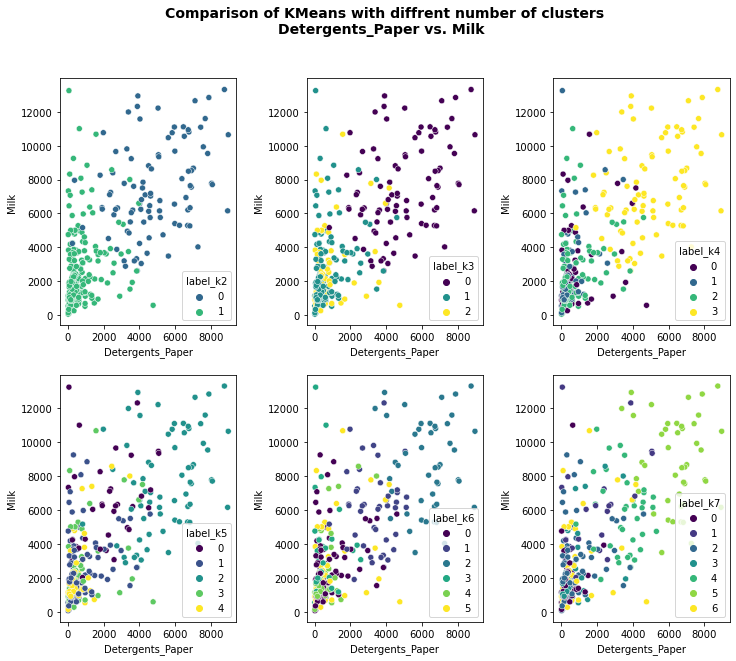

In [49]:
fig = plt.figure(figsize=(12, 10))

fig.subplots_adjust(hspace=0.2, wspace=0.4)

fig.suptitle('Comparison of KMeans with diffrent number of clusters\nDetergents_Paper vs. Milk ', 
             fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(2, 3, 1)
ax_2 = fig.add_subplot(2, 3, 2)
ax_3 = fig.add_subplot(2, 3, 3)
ax_4 = fig.add_subplot(2, 3, 4)
ax_5 = fig.add_subplot(2, 3, 5)
ax_6 = fig.add_subplot(2, 3, 6)

sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='label_k2',ax=ax_1)
sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='label_k3',ax=ax_2)
sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='label_k4',ax=ax_3)
sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='label_k5',ax=ax_4)
sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='label_k6',ax=ax_5)
sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='label_k7',ax=ax_6)

In [50]:
# Your code here
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data) 
    wcss.append(kmeans.inertia_)

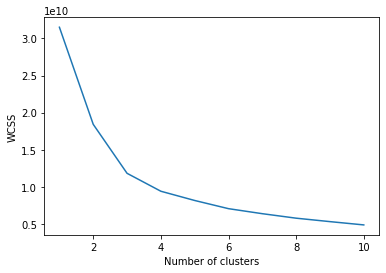

In [51]:
# Your comment here
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [52]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(customers_scale)
y_kmeans = kmeans.predict(customers_scale)

In [54]:
y_kmeans

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [55]:
# Your comment here
#The better is 3 clusters

# Challenge 7 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [56]:
# Your code here
for x in np.arange(0.5, 1, 0.1):
    cluster = DBSCAN(eps=x)
    model = cluster.fit(customers_scale)
    data['labels_DBSCAN'+ str(x)]=model.labels_

In [57]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label,labels_DBSCAN,...,label_k3,label_k4,label_k5,label_k6,label_k7,labels_DBSCAN0.5,labels_DBSCAN0.6,labels_DBSCAN0.7,labels_DBSCAN0.7999999999999999,labels_DBSCAN0.8999999999999999
0,2,3,12669,9656,7561,214,2674,1338,5,-1,...,0,3,0,1,4,-1,-1,-1,-1,-1
1,2,3,7057,9810,9568,1762,3293,1776,5,-1,...,0,3,2,1,4,-1,-1,-1,-1,-1
3,1,3,13265,1196,4221,6404,507,1788,4,-1,...,1,1,4,4,3,-1,-1,-1,-1,-1
5,2,3,9413,8259,5126,666,1795,1451,5,-1,...,0,3,0,1,4,-1,-1,-1,-1,-1
6,2,3,12126,3199,6975,480,3140,545,3,-1,...,0,3,2,1,4,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395,0,-1,...,1,2,1,3,0,-1,-1,-1,-1,-1
433,1,3,1982,3218,1493,1541,356,1449,1,-1,...,1,2,1,0,2,-1,-1,1,0,0
434,1,3,16731,3922,7994,688,2371,838,0,-1,...,1,2,1,3,0,-1,-1,-1,-1,-1
438,1,3,10290,1981,2232,1038,168,2125,0,-1,...,1,2,1,3,2,-1,-1,-1,-1,-1


In [58]:
#dbscan_cluster1 = DBSCAN(eps=0.3, min_samples=5)

#dbscan_cluster1.fit(customers_scale)

#data['labels_DBSCAN1'] = dbscan_cluster1.labels_

#data['labels_DBSCAN1'].value_counts()
######

#dbscan_cluster2 = DBSCAN(eps=0.5, min_samples=10)

#dbscan_cluster2.fit(customers_scale)

#data['labels_DBSCAN2'] = dbscan_cluster2.labels_

#data['labels_DBSCAN2'].value_counts()
#####

#dbscan_cluster3 = DBSCAN(eps=0.9, min_samples=16)

#dbscan_cluster3.fit(customers_scale)

#data['labels_DBSCAN3'] = dbscan_cluster3.labels_

#data['labels_DBSCAN3'].value_counts()

#####
#dbscan_cluster4 = DBSCAN(eps=1, min_samples=20)

#dbscan_cluster4.fit(customers_scale)

#data['labels_DBSCAN4'] = dbscan_cluster4.labels_

#data['labels_DBSCAN4'].value_counts()


<AxesSubplot:title={'center':'eps=07'}, xlabel='Detergents_Paper', ylabel='Milk'>

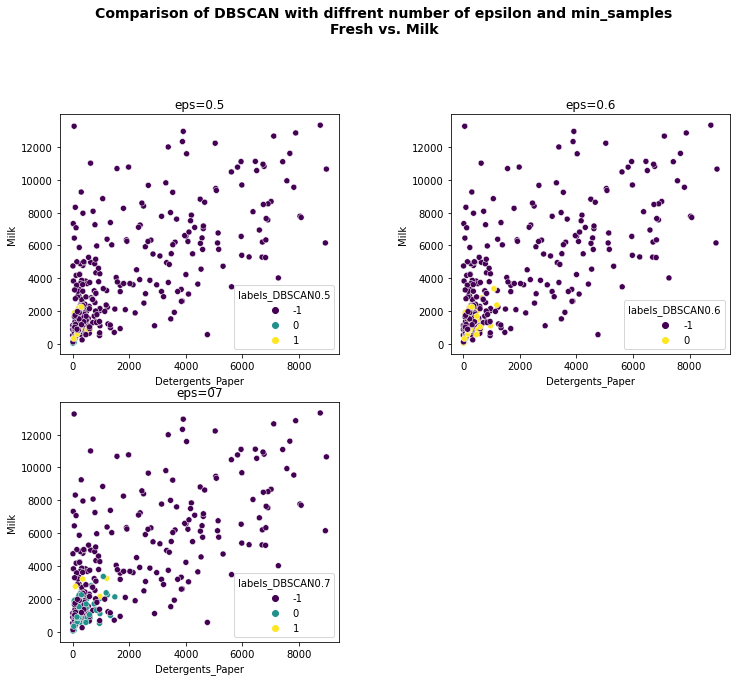

In [59]:
fig = plt.figure(figsize=(12, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.suptitle('Comparison of DBSCAN with diffrent number of epsilon and min_samples\nFresh vs. Milk', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)


ax_1.set_title('eps=0.5')
ax_2.set_title('eps=0.6')
ax_3.set_title('eps=07')



sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='labels_DBSCAN0.5',ax=ax_1)
sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='labels_DBSCAN0.6',ax=ax_2)
sns.scatterplot("Detergents_Paper","Milk", data=data, palette="viridis", hue='labels_DBSCAN0.7',ax=ax_3)



In [60]:
# Your comment here
#0.5 is seems to be the more adequate value for the eps.